In [1]:
import os, pandas, json, pprint
import networkx as nx

#os.chdir('Data')
routes_header = ['airline', 'airline ID','source airport','source airport ID','destination airport','destination airport ID', 'code share', 'stops','equipment']
airports_header = ['id','source airport', 'city','country','source code1','source code2', 'lattitude','longitude','number1','number2','letter','region', 'airport2','airport3']

routes = pandas.read_csv("Data/routes.dat",header=None,names=routes_header,skiprows=1)
airports = pandas.read_csv("Data/airports",header=None,names=airports_header,skiprows=1)

#pandas.merge(routes,airports,left_on=)
#routes.rename(columns = routes_header)
#with open("datapackage.json", "r") as read_file:
 #   data = json.load(read_file)   
#from pprint import pprint
#resources = data["resources"]
#data["resources"][0]["path"]

In [2]:
routes.columns

Index(['airline', 'airline ID', 'source airport', 'source airport ID',
       'destination airport', 'destination airport ID', 'code share', 'stops',
       'equipment'],
      dtype='object')

In [3]:
#Let's focus on the airports table
#Maybe the region field will be useful for setting the scope
airports.head()

,id,source airport,city,country,source code1,source code2,lattitude,longitude,number1,number2,letter,region,airport2,airport3
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
#example of querying 
airports.loc[airports.city =='Bridgetown']

,id,source airport,city,country,source code1,source code2,lattitude,longitude,number1,number2,letter,region,airport2,airport3
2728,2875,Sir Grantley Adams International Airport,Bridgetown,Barbados,BGI,TBPB,13.0746,-59.4925,169,-4,U,America/Barbados,airport,OurAirports


In [5]:
#Lets define the countries of interest

Caribbean = ['Anguilla',
'Antigua and Barbuda',
'Aruba',
'Bahamas',
'Barbados',
'British Virgin Islands',
'Caribbean Netherlands',
'Cayman Islands',
'Cuba',
'Curaçao',
'Dominica',
'Dominican Republic',
'Grenada',
'Guadeloupe',
'Guyana',             
'Haiti',
'Jamaica',
'Martinique',
'Montserrat',
'Puerto Rico',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Sint Maarten',
'Trinidad and Tobago',
'Turks and Caicos Islands',
'United States Virgin Islands']

In [6]:
#Now let's use this list to filter for the airports in the Caribbean

Reg_airports = airports.loc[airports['country'].isin(Caribbean)]

In [7]:
#Interesting to know there are 154 airports in the region of 27 countries
Reg_airports.shape

(153, 14)

In [8]:
len(Caribbean)

27

In [9]:
Reg_airports.head()

,id,source airport,city,country,source code1,source code2,lattitude,longitude,number1,number2,letter,region,airport2,airport3
1697,1753,North Caicos Airport,North Caicos,Turks and Caicos Islands,NCA,MBNC,21.917500,-71.939598,10,-4,U,America/Grand_Turk,airport,OurAirports
1698,1754,Providenciales Airport,Providenciales,Turks and Caicos Islands,PLS,MBPV,21.773600,-72.265900,15,-4,U,America/Grand_Turk,airport,OurAirports
1699,1755,South Caicos Airport,South Caicos,Turks and Caicos Islands,XSC,MBSC,21.515699,-71.528503,6,-4,U,America/Grand_Turk,airport,OurAirports
1700,1756,Arroyo Barril Airport,Samana,Dominican Republic,EPS,MDAB,19.198601,-69.429802,57,-4,U,America/Santo_Domingo,airport,OurAirports
1701,1757,Maria Montez International Airport,Barahona,Dominican Republic,BRX,MDBH,18.251499,-71.120399,10,-4,U,America/Santo_Domingo,airport,OurAirports


In [10]:
Reg_airports['source code1'].unique()

array(['NCA', 'PLS', 'XSC', 'EPS', 'BRX', '\\N', 'LRM', 'PUJ', 'POP',
       'SDQ', 'STI', 'OCJ', 'KIN', 'MBJ', 'POT', 'KTP', 'CAP', 'PAP',
       'BCA', 'BYM', 'AVI', 'CCC', 'CFG', 'CYO', 'CMW', 'SCU', 'GAO',
       'HAV', 'HOG', 'LCL', 'MOA', 'MZO', 'GER', 'UPB', 'SNU', 'VRA',
       'VTU', 'CYB', 'GCM', 'ASD', 'MHH', 'SAQ', 'AXP', 'TCB', 'CCZ',
       'BIM', 'GGT', 'ELH', 'GHB', 'RSD', 'FPO', 'IGA', 'LGI', 'SML',
       'MYG', 'NAS', 'ZSA', 'LTM', 'ANU', 'BGI', 'DCF', 'DOM', 'FDF',
       'SFG', 'PTP', 'GND', 'BQN', 'FAJ', 'SIG', 'MAZ', 'PSE', 'SJU',
       'SKB', 'SLU', 'UVF', 'AUA', 'AXA', 'TAB', 'POS', 'EIS', 'CIW',
       'MQS', 'SVD', 'MNI', 'GEO', 'OGL', 'KAI', 'LYB', 'GDT', 'MDS',
       'SLX', 'AZS', 'JBQ', 'JEE', 'PAX', 'TND', 'COX', 'ATC', 'CAT',
       'CRI', 'PID', 'BBQ', 'DSD', 'BBR', 'SFC', 'GBJ', 'NEV', 'VIJ',
       'BQU', 'UNI', 'LSS', 'VQS', 'CPX', 'ARE', 'COZ', 'NEG', 'RVR',
       'ORJ', 'NAI', 'IMB', 'KAR', 'USI', 'MHA', 'HEX', 'WKR', 'GFO',
       'BWW', 'NGD',

In [11]:
Reg_airports[Reg_airports['source code1'] == '\\N']

,id,source airport,city,country,source code1,source code2,lattitude,longitude,number1,number2,letter,region,airport2,airport3
1702,1758,Cabo Rojo Airport,Cabo Rojo,Dominican Republic,\N,MDCR,17.929001,-71.644798,262,-4,U,America/Santo_Domingo,airport,OurAirports
1707,1763,San Isidro Air Base,San Isidoro,Dominican Republic,\N,MDSI,18.503700,-69.761703,111,-4,U,America/Santo_Domingo,airport,OurAirports
1832,1894,Les Cayes Airport,Cayes,Haiti,\N,MTCA,18.271099,-73.788300,203,-5,U,America/Port-au-Prince,airport,OurAirports
1834,1896,Jacmel Airport,Jacmel,Haiti,\N,MTJA,18.241100,-72.518501,167,-5,U,America/Port-au-Prince,airport,OurAirports
1844,1906,Florida Airport,Florida,Cuba,\N,MUFL,21.499701,-78.202797,197,-5,U,America/Havana,airport,OurAirports
1845,1907,Leeward Point Field,Guantanamo,Cuba,\N,MUGM,19.906500,-75.207100,56,-5,U,\N,airport,OurAirports
1854,1916,Pinar Del Rio Airport,Pinar Del Rio Norte,Cuba,\N,MUPR,22.421400,-83.678398,131,-5,U,America/Havana,airport,OurAirports
1855,1917,San Antonio De Los Banos Airport,San Antonio De Banos,Cuba,\N,MUSA,22.871500,-82.509300,164,-5,U,America/Havana,airport,OurAirports
1857,1919,Joaquín de Agüero Airport,Santa Lucia,Cuba,\N,MUSL,21.509456,-77.020597,13,-5,U,America/Havana,airport,OurAirports
1858,1920,Siguanea Airport,Siguanea,Cuba,\N,MUSN,21.642500,-82.955101,39,-5,U,America/Havana,airport,OurAirports


In [12]:
# The routes table uses IATA airport codes
# The next goal is filter the routes table into 3 categories
#  Group 1 - routes starting outside the region and ending in the Caribbean
#  Group 2 - routes starting inside the Caribbean and ending outside the region
#  Group 3 - routes starting and ending in the Caribbean

# To perform the filter, we need the list of airport codes in the Caribbean
# This is found in Reg_airports['source code 1']

Group1 = routes.loc[routes['destination airport'].isin(Reg_airports['source code1'])]
Group2 = routes.loc[routes['source airport'].isin(Reg_airports['source code1'])]


In [13]:
Group3 = routes.loc[routes['source airport'].isin(Reg_airports['source code1']) &
                   routes['destination airport'].isin(Reg_airports['source code1'])]

In [14]:
# Now to add the source country and destination country for each route
# This will require using the Reg_airports data table field names 'country'
# For each 'source airport' and 'destination airport' in Group 3

Reg_lookup =Reg_airports[['source code1','country']]
# source_country = Reg_airports.lookup(Group3['source airport'],Reg_airports['country'])


In [15]:
Reg_lookup

,source code1,country
1697,NCA,Turks and Caicos Islands
1698,PLS,Turks and Caicos Islands
1699,XSC,Turks and Caicos Islands
1700,EPS,Dominican Republic
1701,BRX,Dominican Republic
1702,\N,Dominican Republic
1703,LRM,Dominican Republic
1704,PUJ,Dominican Republic
1705,POP,Dominican Republic
1706,SDQ,Dominican Republic


In [16]:
#Group3['source country'] = Group3.'source airport'.map(Reg_lookup)

Group3 = pandas.merge(Group3, Reg_lookup, how='left',
        left_on='source airport', right_on='source code1')

In [17]:
Group3.head()

,airline,airline ID,source airport,source airport ID,destination airport,destination airport ID,code share,stops,equipment,source code1,country
0,3M,20710,GGT,1941,GHB,1944,NaN,0,SF3,GGT,Bahamas
1,3S,11741,ANU,2874,PTP,2881,NaN,0,AT5,ANU,Antigua and Barbuda
2,3S,11741,DOM,2877,PTP,2881,NaN,0,AT5,DOM,Dominica
3,3S,11741,FDF,2878,PTP,2881,NaN,0,AT5 320,FDF,Martinique
4,3S,11741,FDF,2878,SDQ,1762,NaN,0,AT5,FDF,Martinique


In [18]:
Group3.rename(index=str, columns={"country": "source country"})

,airline,airline ID,source airport,source airport ID,destination airport,destination airport ID,code share,stops,equipment,source code1,source country
0,3M,20710,GGT,1941,GHB,1944,NaN,0,SF3,GGT,Bahamas
1,3S,11741,ANU,2874,PTP,2881,NaN,0,AT5,ANU,Antigua and Barbuda
2,3S,11741,DOM,2877,PTP,2881,NaN,0,AT5,DOM,Dominica
3,3S,11741,FDF,2878,PTP,2881,NaN,0,AT5 320,FDF,Martinique
4,3S,11741,FDF,2878,SDQ,1762,NaN,0,AT5,FDF,Martinique
5,3S,11741,FDF,2878,SLU,2893,NaN,0,AT5,FDF,Martinique
6,3S,11741,PTP,2881,ANU,2874,NaN,0,AT5,PTP,Guadeloupe
7,3S,11741,PTP,2881,DOM,2877,NaN,0,AT5,PTP,Guadeloupe
8,3S,11741,PTP,2881,FDF,2878,NaN,0,AT5 320,PTP,Guadeloupe
9,3S,11741,PTP,2881,SDQ,1762,NaN,0,AT5,PTP,Guadeloupe


In [19]:
# Now to add the destination country

Group3 = pandas.merge(Group3, Reg_lookup, how='left',
        left_on='destination airport', right_on='source code1')

In [20]:
Group3.head()

,airline,airline ID,source airport,source airport ID,destination airport,destination airport ID,code share,stops,equipment,source code1_x,country_x,source code1_y,country_y
0,3M,20710,GGT,1941,GHB,1944,NaN,0,SF3,GGT,Bahamas,GHB,Bahamas
1,3S,11741,ANU,2874,PTP,2881,NaN,0,AT5,ANU,Antigua and Barbuda,PTP,Guadeloupe
2,3S,11741,DOM,2877,PTP,2881,NaN,0,AT5,DOM,Dominica,PTP,Guadeloupe
3,3S,11741,FDF,2878,PTP,2881,NaN,0,AT5 320,FDF,Martinique,PTP,Guadeloupe
4,3S,11741,FDF,2878,SDQ,1762,NaN,0,AT5,FDF,Martinique,SDQ,Dominican Republic


In [21]:
routes.head()

,airline,airline ID,source airport,source airport ID,destination airport,destination airport ID,code share,stops,equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [22]:
def dest_routes(table):
    """
        Creates a dictionary roster of destinations for each location.
        
        Parameters
        ----------
        table : a pandas dataframe

        Returns
        -------
        dataframe
            3 columns:
            - source airport
            - airport location (tuple of coordinates)
            - list of destination airports

        Examples
        --------
        dest_routes(routes)
    """   
    
        
    return table.groupby('source airport')['destination airport'].apply(lambda x: list(x)).reset_index()

In [23]:
roster = dest_routes(routes)

In [24]:
roster[roster['source airport'] == 'BGI']

,source airport,destination airport
256,BGI,"[MIA, YYZ, JFK, LGW, ANU, KIN, POS, SXM, FRA, ..."


In [25]:
roster['source airport'].head()

0    AAE
1    AAL
2    AAN
3    AAQ
4    AAR
Name: source airport, dtype: object

In [26]:
draw_params = {"node_color" : "pink", "font_size" : 20, "with_labels" : True, "arrowsize" : 30}
def route_mapper(roster, airport):
    """
        Creates a dictionary roster of destinations for each location.
        
        Parameters
        ----------
        roster : a pandas dataframe with 2 columns:
            - source airport
            - list of destination airports 
        
        airport : a string representing an airport code
        
        Returns
        -------
        graph

        Examples
        --------
        route_mapper(routes)
    """       
    G = nx.Graph()
    G.add_node(airport)
    list(map(lambda x: G.add_node(x), list(roster[roster['source airport'] == airport]['destination airport'])[0]))
    list(map(lambda x: G.add_edge(airport,x),list(roster[roster['source airport'] == airport]['destination airport'])[0]))
    return G

In [29]:
Barbados = route_mapper(roster, 'BGI')


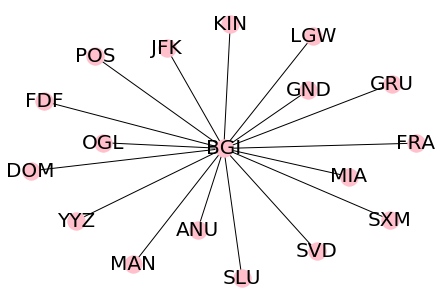

In [30]:

nx.draw(Barbados, **draw_params)



In [31]:
Miami = route_mapper(roster, 'MIA')

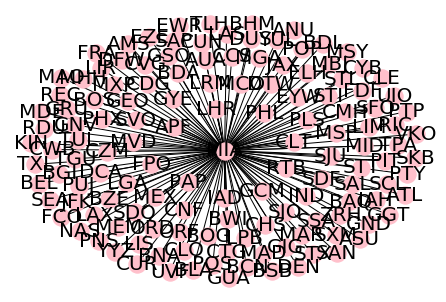

In [32]:
nx.draw(Miami, **draw_params)

In [107]:
Reg_airports.head()

,id,source airport,city,country,source code1,source code2,lattitude,longitude,number1,number2,letter,region,airport2,airport3
1697,1753,North Caicos Airport,North Caicos,Turks and Caicos Islands,NCA,MBNC,21.917500,-71.939598,10,-4,U,America/Grand_Turk,airport,OurAirports
1698,1754,Providenciales Airport,Providenciales,Turks and Caicos Islands,PLS,MBPV,21.773600,-72.265900,15,-4,U,America/Grand_Turk,airport,OurAirports
1699,1755,South Caicos Airport,South Caicos,Turks and Caicos Islands,XSC,MBSC,21.515699,-71.528503,6,-4,U,America/Grand_Turk,airport,OurAirports
1700,1756,Arroyo Barril Airport,Samana,Dominican Republic,EPS,MDAB,19.198601,-69.429802,57,-4,U,America/Santo_Domingo,airport,OurAirports
1701,1757,Maria Montez International Airport,Barahona,Dominican Republic,BRX,MDBH,18.251499,-71.120399,10,-4,U,America/Santo_Domingo,airport,OurAirports


In [35]:
airports.head()

,id,source airport,city,country,source code1,source code2,lattitude,longitude,number1,number2,letter,region,airport2,airport3
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [18]:
miniair = airports[['source code1','country']]
#pandas.merge(routes,airports, left_on="source airport", right_on='source code1')
miniair.shape

(7183, 2)

In [19]:
routes2 =pandas.merge(routes,miniair, left_on="source airport", right_on ='source code1')

In [20]:
lean_routes = routes2[['airline','airline ID','source airport','destination airport','stops','country']]

In [21]:
lean_routes.columns = ['airline','airline_ID','source_airport','destination_airport','stops','source_country']

In [22]:
lean_routes2 =pandas.merge(lean_routes,miniair, left_on="destination_airport", right_on ='source code1')

In [23]:
lean_routes3 = lean_routes2[.head()

SyntaxError: invalid syntax (<ipython-input-23-8133665c57df>, line 1)

In [197]:
lean_routes[lean_routes['source_airport']=='BGI']

,airline,airline_ID,source_airport,destination_airport,stops,source_country
48056,AA,24,BGI,MIA,0,Barbados
48057,AC,330,BGI,YYZ,0,Barbados
48058,B6,3029,BGI,JFK,0,Barbados
48059,BA,1355,BGI,LGW,0,Barbados
48060,BW,1663,BGI,ANU,0,Barbados
48061,BW,1663,BGI,KIN,0,Barbados
48062,BW,1663,BGI,POS,0,Barbados
48063,BW,1663,BGI,SXM,0,Barbados
48064,DE,1868,BGI,FRA,0,Barbados
48065,DE,1868,BGI,MAN,0,Barbados


In [182]:
miniair.head()

,source code1,country
0,MAG,Papua New Guinea
1,HGU,Papua New Guinea
2,LAE,Papua New Guinea
3,POM,Papua New Guinea
4,WWK,Papua New Guinea
